<a href="https://colab.research.google.com/github/CarlHad333/Non_Verbal_Behaviour/blob/main/SER_ST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IEMOCAP


In [10]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Ethan's Idea

# PATH='the path to the database locally'

# open(PATH + '/filename')


In [12]:
#cd to the google drive you using the magic command
%cd /content/gdrive/'My Drive'/'ST7_Le_numerique_au_service_du_facteur_humain'/'IEMOCAP_full_release_withoutVideos_sentenceOnly'/'IEMOCAP_full_release'

/content/gdrive/.shortcut-targets-by-id/1H_wIpsIF42ILnS8ZNz7BovI5ga272ikl/IEMOCAP_full_release_withoutVideos_sentenceOnly/IEMOCAP_full_release


In [13]:
#check your directory location with
!pwd

/content/gdrive/.shortcut-targets-by-id/1H_wIpsIF42ILnS8ZNz7BovI5ga272ikl/IEMOCAP_full_release_withoutVideos_sentenceOnly/IEMOCAP_full_release


In [ ]:
import numpy as np
import os
import pandas
import librosa

In [ ]:
def get_labels(annot_file, file_name):

    f = open(annot_file, 'r').read()
    f = f.split('\n')
    f = f[2:]

    for data in f:

        if len(data) > 0:
            if data[0] == '[':
                data2 = data.split('\t')

                if data2[1] == file_name:
                    emo = data2[2]
                    vad = data2[3][1:-1].split(', ')
                    return emo, [float(x) for x in vad]

    raise ValueError('Label not found')

def get_mocap_rot(path):

    f = open(path, 'r').read()
    f = np.array(f.split('\n'))
    header = f[0].split(' ')
    xyz = f[1].split(' ')
    f = f[2:]

    data_list = []

    for data in f:
        data2 = data.split(' ')
        if(len(data2)<2):
            continue
        dic = {'frame': data2[0], 'time': data2[1],
               'markers': np.array(data2[2:]).astype(float)}
        data_list.append(dic)

    return header, xyz, data_list

def get_wav(path):
    x, sr = librosa.load(path, sr=16000)
    return x, sr

def get_ph_fa(path):
    f = open(path, 'r').read()
    f = np.array(f.split('\n'))
    header = f[0].split()
    f = f[1:-2]
    data_list = []

    for data in f:
        data2 = data.split()
        dic = {'SFrm':np.array(data2[0]).astype(int),
               'EFrm':np.array(data2[1]).astype(int),
               'SegAScr':np.array(data2[2]).astype(int),
               'Phone':data2[3]}
        data_list.append(dic)

    return header, data_list

def frame_to_s(fr):
    return (fr+2)*10/1000

In [ ]:
root_path = '/content/gdrive/MyDrive/IEMOCAP_full_release_withoutVideos_sentenceOnly'

df = pandas.read_csv(os.path.join(root_path, 'iemocap.csv'))
sessions = [1, 2, 3, 4, 5]
df = df[df['session'].isin(sessions)]

# Remove unwanted emotions and empty values
unwanted_emotions = ['xxx', '', 'oth', 'dis', 'sur', 'fea']
df = df[~df['emotion'].isin(unwanted_emotions)]

# Calculate annotator difference
df['annotator_difference'] = df['n_annotators'] - df['agreement']

# Filter by annotator difference
df = df[df['annotator_difference'] <= 1]

# Replace 'exc' emotion with 'hap'
df.loc[df['emotion'] == 'exc', 'emotion'] = 'hap'


emotions_count_before = df['emotion'].value_counts()
print("Emotions count before filtering:")
print(emotions_count_before)

# Group by emotion and select first 550 rows of each group
df = df.groupby('emotion').head(550)

# Count the occurrences of each emotion after filtering
emotions_count_after = df['emotion'].value_counts()
print("\nEmotions count after filtering:")
print(emotions_count_after)

# Display the first 5 rows
display(df)
#Ntotal = 5531 utterances that are labeled with one of
#five categories: Happy, Angry, Neutral, Sad, Exited. This set is
#mapped down to four categories by merging Exited and Happy


Emotions count before filtering:
fru    1692
neu    1551
hap    1471
ang    1077
sad    1000
Name: emotion, dtype: int64

Emotions count after filtering:
neu    550
fru    550
ang    550
hap    550
sad    550
Name: emotion, dtype: int64


,Unnamed: 0,session,method,gender,n_annotators,agreement,emotion,valence,activation,dominance,wav_path,MOCAP_rotated_path,MOCAP_head_path,MOCAP_hand_path,FA_ph_path,FA_st_path,FA_sy_path,FA_wd_path,annotator_difference
0,0,1,script,F,3,3,neu,2.5,2.0,2.0,IEMOCAP_full_release/Session1/sentences/wav/Se...,IEMOCAP_full_release/Session1/sentences/MOCAP_...,IEMOCAP_full_release/Session1/sentences/MOCAP_...,IEMOCAP_full_release/Session1/sentences/MOCAP_...,IEMOCAP_full_release/Session1/sentences/Forced...,IEMOCAP_full_release/Session1/sentences/Forced...,IEMOCAP_full_release/Session1/sentences/Forced...,IEMOCAP_full_release/Session1/sentences/Forced...,0
1,1,1,script,F,3,2,fru,2.5,2.0,2.5,IEMOCAP_full_release/Session1/sentences/wav/Se...,IEMOCAP_full_release/Session1/sentences/MOCAP_...,IEMOCAP_full_release/Session1/sentences/MOCAP_...,IEMOCAP_full_release/Session1/sentences/MOCAP_...,IEMOCAP_full_release/Session1/sentences/Forced...,IEMOCAP_full_release/Session1/sentences/Forced...,IEMOCAP_full_release/Session1/sentences/Forced...,IEMOCAP_full_release/Session1/sentences/Forced...,1
4,4,1,script,F,3,2,neu,2.0,3.0,3.0,IEMOCAP_full_release/Session1/sentences/wav/Se...,IEMOCAP_full_release/Session1/sentences/MOCAP_...,IEMOCAP_full_release/Session1/sentences/MOCAP_...,IEMOCAP_full_release/Session1/sentences/MOCAP_...,IEMOCAP_full_release/Session1/sentences/Forced...,IEMOCAP_full_release/Session1/sentences/Forced...,IEMOCAP_full_release/Session1/sentences/Forced...,IEMOCAP_full_release/Session1/sentences/Forced...,1
6,6,1,script,F,3,2,ang,2.0,3.5,3.0,IEMOCAP_full_release/Session1/sentences/wav/Se...,IEMOCAP_full_release/Session1/sentences/MOCAP_...,IEMOCAP_full_release/Session1/sentences/MOCAP_...,IEMOCAP_full_release/Session1/sentences/MOCAP_...,IEMOCAP_full_release/Session1/sentences/Forced...,IEMOCAP_full_release/Session1/sentences/Forced...,IEMOCAP_full_release/Session1/sentences/Forced...,IEMOCAP_full_release/Session1/sentences/Forced...,1
7,7,1,script,F,3,2,ang,2.0,3.5,2.5,IEMOCAP_full_release/Session1/sentences/wav/Se...,IEMOCAP_full_release/Session1/sentences/MOCAP_...,IEMOCAP_full_release/Session1/sentences/MOCAP_...,IEMOCAP_full_release/Session1/sentences/MOCAP_...,IEMOCAP_full_release/Session1/sentences/Forced...,IEMOCAP_full_release/Session1/sentences/Forced...,IEMOCAP_full_release/Session1/sentences/Forced...,IEMOCAP_full_release/Session1/sentences/Forced...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5350,5350,3,impro,M,4,3,ang,2.0,3.0,4.0,IEMOCAP_full_release/Session3/sentences/wav/Se...,IEMOCAP_full_release/Session3/sentences/MOCAP_...,IEMOCAP_full_release/Session3/sentences/MOCAP_...,IEMOCAP_full_release/Session3/sentences/MOCAP_...,IEMOCAP_full_release/Session3/sentences/Forced...,IEMOCAP_full_release/Session3/sentences/Forced...,IEMOCAP_full_release/Session3/sentences/Forced...,IEMOCAP_full_release/Session3/sentences/Forced...,1
5493,5493,3,script,M,3,3,ang,2.0,4.0,4.0,IEMOCAP_full_release/Session3/sentences/wav/Se...,IEMOCAP_full_release/Session3/sentences/MOCAP_...,IEMOCAP_full_release/Session3/sentences/MOCAP_...,IEMOCAP_full_release/Session3/sentences/MOCAP_...,IEMOCAP_full_release/Session3/sentences/Forced...,IEMOCAP_full_release/Session3/sentences/Forced...,IEMOCAP_full_release/Session3/sentences/Forced...,IEMOCAP_full_release/Session3/sentences/Forced...,0
5494,5494,3,script,M,3,2,ang,3.0,2.5,3.0,IEMOCAP_full_release/Session3/sentences/wav/Se...,IEMOCAP_full_release/Session3/sentences/MOCAP_...,IEMOCAP_full_release/Session3/sentences/MOCAP_...,IEMOCAP_full_release/Session3/sentences/MOCAP_...,IEMOCAP_full_release/Session3/sentences/Forced...,IEMOCAP_full_release/Session3/sentences/Forced...,IEMOCAP_full_release/Session3/sentences/Forced...,IEMOCAP_full_release/Session3/sentences/Forced...,1
5497,5497,3,script,M,3,2,ang,2.0,4.0,3.5,IEMOCAP_full_release/Session3/sentences/wav/Se...,IEMOCAP_full_release/Session3/sentences/MOCAP_...,IEMOCAP_full_release/Session3/sentences/MOCAP_.

In [ ]:
for index, row in df.iterrows():

    session = row['session']
    method = row['method']
    gender = row['gender']
    emotion = row['emotion']
    n_annot = row['emotion']
    agreement = row['agreement']
    wav_path = row['wav_path']

    _, file_name = os.path.split(wav_path)

    annot_file = os.path.join(root_path, 'IEMOCAP_full_release',
                              'Session'+str(session),
                              'dialog', 'EmoEvaluation',
                              file_name[:-9] + '.txt')

    # get labels
    emo, vad = get_labels(annot_file, file_name[:-4])

    # get MOCAP data
    header_rot, xyz_rot, data_rot = get_mocap_rot(os.path.join(root_path, row['MOCAP_rotated_path']))

    # get audio data
    x, sr = get_wav(os.path.join(root_path, row['wav_path']))

    # get transcription data
    header_ph, data_ph = get_ph_fa(os.path.join(root_path, row['FA_ph_path']))

    break

print(emo)
print(vad)
print(frame_to_s(data_ph[-1]['EFrm']))
print(x.shape[0]/sr)
print(data_rot[-1]['time'])

neu
[2.5, 2.0, 2.0]
2.07
2.07
2.06895


Pre-Processing and  feature exctraction of only the WAV format (Audio)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
%matplotlib inline

features = []  # List to store extracted features
labels = []    # List to store corresponding emotion labels

for index, row in df.iterrows():
    session = row['session']
    wav_path = row['wav_path']
    emotion = row['emotion']

    # Extract filename from WAV path
    _, file_name = os.path.split(wav_path)

    # Construct path to annotation file
    annot_file = os.path.join(root_path, 'IEMOCAP_full_release',
                              'Session'+str(session),
                              'dialog', 'EmoEvaluation',
                              file_name[:-9] + '.txt')

    # Load audio data
    x, sr = get_wav(os.path.join(root_path, wav_path))

    # Extract features (e.g., MFCCs)
    mfccs = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=13)

    #print(mfccs.shape)


    # Flatten MFCCs (you may choose to use other features as well)
    flattened_mfccs = mfccs.flatten()

    # Append features and labels to the lists
    features.append(flattened_mfccs)
    labels.append(emotion)


# Remove features without corresponding labels

filtered_features = []
filtered_labels = []
for feature, label in zip(features, labels):
    if label is not None:
        filtered_features.append(feature)
        filtered_labels.append(label)

# Convert filtered lists to NumPy arrays for model training
# Calculate the maximum length of features
max_length = max(len(feature) for feature in filtered_features)

# Pad or truncate features to the maximum length
padded_filtered_features = [np.pad(feature, (0, max_length - len(feature))) for feature in filtered_features]
#print(padded_filtered_features)

X_filtered = np.array(padded_filtered_features)
y_filtered = np.array(filtered_labels)

# **SVM**

Training using SVM's

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Support Vector Machine (SVM) classifier
svm_classifier = SVC(kernel='rbf', C=10.0, random_state=42, gamma=0.001)
svm_classifier.fit(X_train_scaled, y_train)

# Evaluate the classifier
accuracy = svm_classifier.score(X_test_scaled, y_test)
print("Accuracy:", accuracy)

# Plot the coefficients of the SVM classifier if applicable
y_pred = svm_classifier.predict(X_test_scaled)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=svm_classifier.classes_, yticklabels=svm_classifier.classes_)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()


# **MLP**

In [ ]:
import torch
import random
import numpy as np

# Set random seed for reproducibility
seed = 42
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)

Training using a MLP

In [ ]:
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score


# Convert emotion labels to numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_filtered)

# Normalize features using StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_filtered)

# Convert NumPy arrays to PyTorch tensors
X_tensor = torch.tensor(X_normalized, dtype=torch.float32)
y_tensor = torch.tensor(y_encoded, dtype=torch.long)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

# Define batch size
batch_size = 16  # Adjust batch size as needed

# Create data loaders for training and testing sets
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define the neural network architecture
class EmotionClassifier(nn.Module):
    def __init__(self, input_size, hidden_size_1, hidden_size_2, num_classes, dropout_prob=0.3):
        super(EmotionClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size_1)
        self.fc2 = nn.Linear(hidden_size_1, hidden_size_2)
        self.fc3 = nn.Linear(hidden_size_2, num_classes)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        self.tanh = nn.Tanh()

        self.dropout = nn.Dropout(dropout_prob)

    def forward(self, x):
        out = self.fc1(x)
        out = self.dropout(out)
        out = self.fc2(self.tanh(out))
        out = self.dropout(out)
        out = self.fc3(self.tanh(out))

        return out

# Hyperparameters
input_size = X_train.shape[1]
hidden_size_1 = 150
hidden_size_2 = 36


num_classes = len(label_encoder.classes_)

learning_rate = 0.001
num_epochs = 200

# Initialize the model
model = EmotionClassifier(input_size, hidden_size_1, hidden_size_2 , num_classes, dropout_prob=0.3)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    # Iterate over batches
    for inputs, targets in train_loader:
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

#Testing########################################################################

# Initialize an empty list to store precision for each emotion
precisions = []

# Initialize variables to store predictions and true labels
all_predictions = []
all_targets = []

# Evaluate the model
correct = 0
total = 0
with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        all_predictions.extend(predicted.tolist())
        all_targets.extend(targets.tolist())
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

# Convert predictions and targets to NumPy arrays
all_predictions = np.array(all_predictions)
all_targets = np.array(all_targets)

# Calculate precision for each emotion label
for emotion_label in range(num_classes):
    precision = precision_score(all_targets == emotion_label, all_predictions == emotion_label)
    precisions.append((label_encoder.inverse_transform([emotion_label])[0], precision))

# Print precision for each emotion
for emotion, precision in precisions:
    print(f'Precision for {emotion}: {precision:.4f}')

# Calculate final accuracy
accuracy = correct / total
print(f'Final Accuracy: {accuracy:.4f}')

Epoch [10/200], Loss: 0.8007
Epoch [20/200], Loss: 0.9980
Epoch [30/200], Loss: 0.5552
Epoch [40/200], Loss: 0.5293
Epoch [50/200], Loss: 0.3128
Epoch [60/200], Loss: 0.2110
Epoch [70/200], Loss: 0.4363
Epoch [80/200], Loss: 0.5733
Epoch [90/200], Loss: 0.0567
Epoch [100/200], Loss: 0.3397
Epoch [110/200], Loss: 0.0991
Epoch [120/200], Loss: 0.0479
Epoch [130/200], Loss: 0.4560
Epoch [140/200], Loss: 0.1551
Epoch [150/200], Loss: 0.0408
Epoch [160/200], Loss: 0.0154
Epoch [170/200], Loss: 0.0461
Epoch [180/200], Loss: 0.2146
Epoch [190/200], Loss: 0.0058
Epoch [200/200], Loss: 0.3522
Precision for ang: 0.4262
Precision for exc: 0.3768
Precision for fru: 0.2000
Precision for hap: 0.1980
Precision for sad: 0.4270
Final Accuracy: 0.3150


150 - 36 - 0.3 - 100 epochs - 36.5% (31.5% wtf) 34.5 150epochs

# **XGBoost**

Training with XGBoost [which is one possible implementation with Gradient Boosting Machines (GBM)]

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Convert emotion labels to numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_filtered)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filtered)

# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)


# Define hyperparameters for XGBoost
params = {
    'objective': 'multi:softmax',  # Multiclass classification objective
    'num_class': len(label_encoder.classes_),  # Number of classes
    'max_depth': 15,  # Maximum depth of each tree
    'eta': 0.3,  # Learning rate
    'subsample': 0.8,  # Subsample ratio of the training instances
    'colsample_bytree': 0.8,  # Subsample ratio of columns when constructing each tree
    'verbosity': 1  # 0 for silent mode, 1 for print messages
}

# Convert data into DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Train the XGBoost model
num_rounds = 150  # Number of boosting rounds
model = xgb.train(params, dtrain, num_rounds)

# Make predictions on the test set
preds = model.predict(dtest)

# Evaluate the model
accuracy = accuracy_score(y_test, preds)
print(f'Accuracy: {accuracy:.4f}')


Accuracy: 0.4073


XGB Confusion Matrix

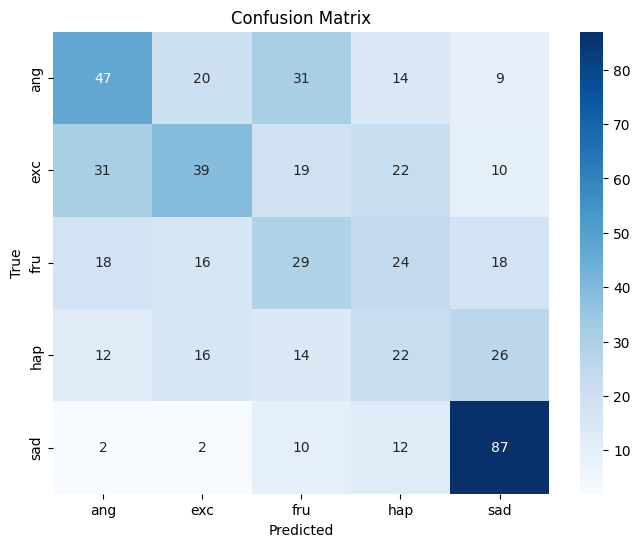

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, preds)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# **Random Forest**

In [ ]:
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filtered)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_filtered, test_size=0.2, random_state=42)


# Initialize Random Forest classifier with desired parameters
rf = RandomForestClassifier(n_estimators=400, max_depth=15, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.4109090909090909


#RF Visualization (Not Intuitive)

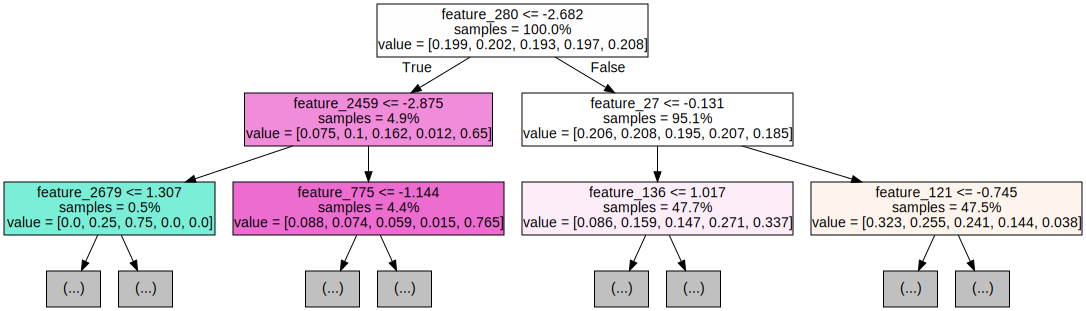

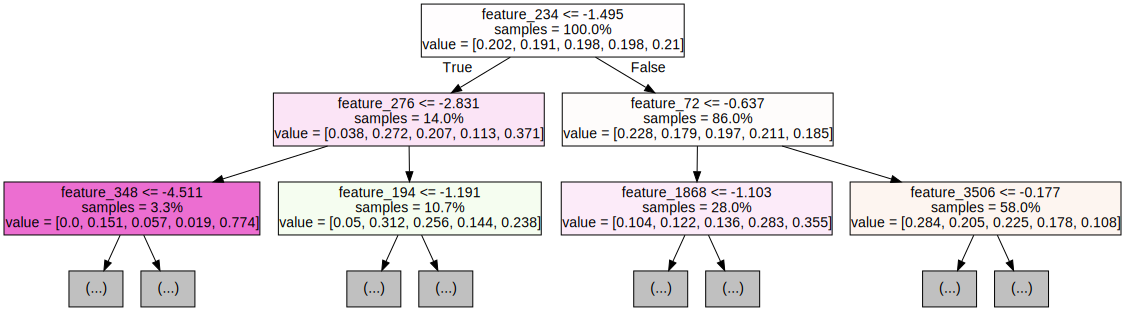

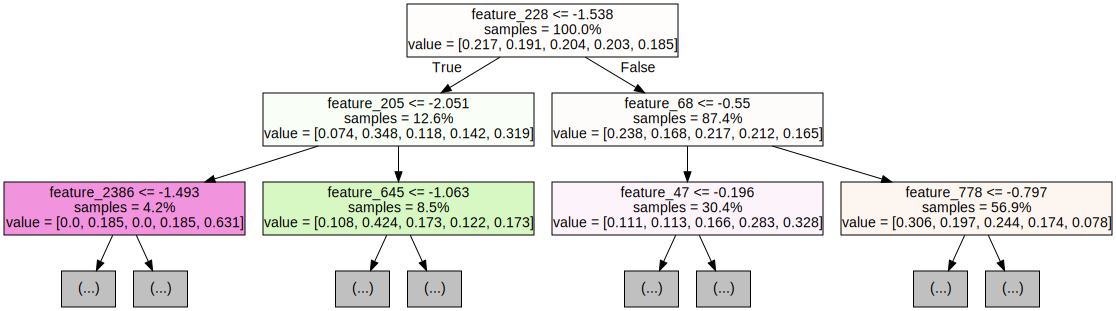

In [ ]:
# Fit the random forest classifier
rf.fit(X_train, y_train)

# Access the individual decision trees
for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               out_file=None,
                               feature_names=[f'feature_{i}' for i in range(X_train.shape[1])],
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)


Random Search for hyperparameter tuning and fiding an optimal model


In [ ]:
param_dist = {'n_estimators': randint(100,500),
              'max_depth': randint(10,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=20,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)


Best hyperparameters: {'max_depth': 15, 'n_estimators': 416}


In [ ]:
best_rf = RandomForestClassifier(max_depth=15, n_estimators=200)

best_rf.fit(X_train, y_train)

y_pred = best_rf.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.4075


# Meta-Model (RF + XGB + MLP) --> RF

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import LabelEncoder




# Convert emotion labels to numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_filtered)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filtered)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_filtered, test_size=0.2, random_state=42)

# Define base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=400, max_depth=15 , random_state=42)),
    #('mlp', MLPClassifier(hidden_layer_sizes=(200,), max_iter=100, random_state=42)),
    ('xgb', XGBClassifier(n_estimators=150, max_depth=15, random_state=42))]

# Define meta-model
meta_model = RandomForestClassifier(n_estimators=400, max_depth=15 , random_state=42)

# Create stacking classifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Train stacking model
stacking_model.fit(X_train, y_train)

# Make predictions
y_pred = stacking_model.predict(X_test)

# Create voting classifier
#voting_model = VotingClassifier(estimators=base_models, voting='soft')

# Train voting classifier
#voting_model.fit(X_train, y_train)

# Make predictions
#y_pred = voting_model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print("Voting Classifier Accuracy:", accuracy)



Voting Classifier Accuracy: 0.41454545454545455


0.395 for 100 estimators for each, no max depth and also MLP with 100 hidden (more than 10 min)
0.35 without MLP 400 estimators and 15 depth for RF and XGB